In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
file_path = '/content/test dataset.xlsx'# Update this with your actual file path
data = pd.read_excel(file_path)

In [4]:
X = data[['LineVoltageVRY','LineVoltageVYB','LineVoltageVBR','LineCurrentIR','LineCurrentIY','LineCurrentIB','PowerFactor','Frequency','days','season']]
y = data['RealPower']

In [5]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [8]:
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [9]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 0.01]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'coef0': [0, 1]}
]

# Initialize the SVR model
svr = SVR()


In [ ]:
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best estimator
best_svr = grid_search.best_estimator_

In [ ]:
y_pred_train_scaled = best_svr.predict(X_train_scaled)
y_pred_test_scaled = best_svr.predict(X_test_scaled)

In [ ]:
results = pd.DataFrame({'Actual': y_test_scaled, 'Predicted':y_pred_test_scaled})
print(results)

       Actual  Predicted
0    0.769514   0.606247
1    0.321101   0.166994
2    0.309813   0.392281
3    0.707070   0.911636
4    0.746065   0.720624
..        ...        ...
111  0.760754   0.799663
112  0.074133   0.343261
113  0.832164   0.708194
114  0.765820   0.850637
115  0.702493   0.699812

[116 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse_test = mean_squared_error(y_test_scaled,y_pred_test_scaled )
r2_test = r2_score(y_test_scaled,y_pred_test_scaled)
mae_test = mean_absolute_error(y_test_scaled, y_pred_test_scaled)
mpe_test = np.mean(np.abs((y_test_scaled - y_pred_test_scaled) / y_test)) * 100
print(f'Testing MSE: {mse_test}')
print(f'Testing R²: {r2_test}')
print(f'Testing MAE: {mae_test}')
print(f'Testing MPE: {mpe_test}')

Testing MSE: 0.006398900758000076
Testing R²: 0.010087127260632323
Testing MAE: 0.046639286358887914
Testing MPE: 0.00506350147791696


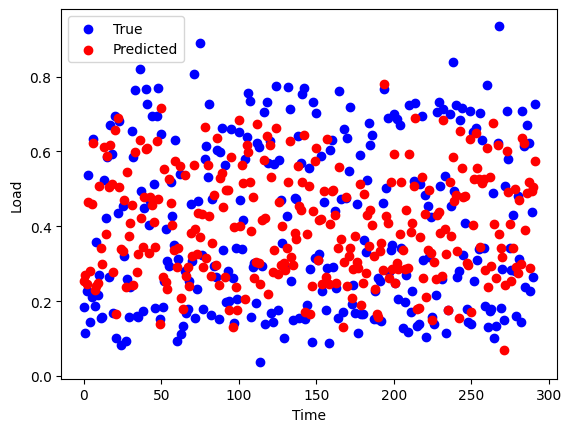

In [ ]:
plt.scatter(range(len(y_test_scaled)), y_test_scaled, color='blue', label='True')
plt.scatter(range(len(y_pred_test_scaled)), y_pred_test_scaled, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()

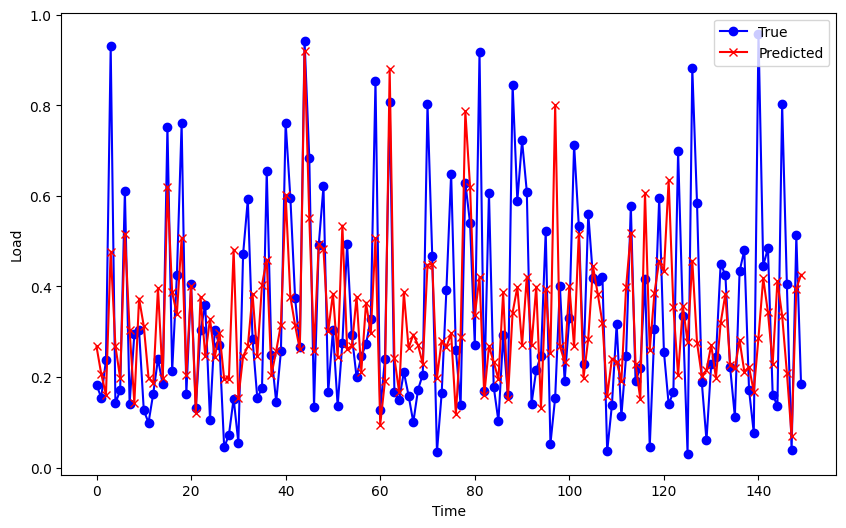

In [ ]:
import matplotlib.pyplot as plt

# Define the number of points to display
num_points = 150

# Ensure we only take the first 150 points
y_test_subset = y_test_scaled[:num_points]
predictions_subset = y_pred_test_scaled[:num_points]

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_subset)), y_test_subset, color='blue', marker='o', linestyle='-', label='True')
plt.plot(range(len(predictions_subset)), predictions_subset, color='red', marker='x', linestyle='-', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()